<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Logo</title>
  <style>
    body {
      display: flex;
      justify-content: center;
      align-items: center;
      min-height: 100vh;
      margin: 0;
      background-color: #f4f4f9;
      font-family: Arial, sans-serif;
    }
    .logo {
      display: flex;
      align-items: center;
      gap: 15px;
      background: linear-gradient(135deg, #ff9800, #4caf50);
      color: white;
      padding: 20px 30px;
      border-radius: 10px;
      box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);
    }
    .logo-icon {
      font-size: 3rem;
      display: flex;
      align-items: center;
      justify-content: center;
      background-color: white;
      color: #ff9800;
      width: 60px;
      height: 60px;
      border-radius: 50%;
      font-weight: bold;
    }
    .logo-text {
      text-align: left;
    }
    .logo-title {
      font-size: 1.5rem;
      margin: 0;
    }
    .logo-subtitle {
      font-size: 0.9rem;
      margin: 0;
      opacity: 0.8;
    }
  </style>
</head>
<body>
  <div class="logo">
    <div class="logo-icon">AAM</div>
    <div class="logo-text">
      <h1 class="logo-title">Ayad - Askar - Mahdy</h1>
      <p class="logo-subtitle">Machine Learning App</p>
    </div>
  </div>
</body>
</html>



### Load and clean the data
- Load the CSV file and assign proper column names.
- Drop the `ID` column as it doesn't contribute to analysis.
- Convert the `Diagnosis` column from categorical (M/B) to numeric (1/0).
- Check for any missing values and verify data types.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
columns = [
    'ID', 'Diagnosis', 
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
    'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

df = pd.read_csv("D:\\ML\\wdbc.csv", header=None, names=columns)

In [3]:
df.head()

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.drop('ID', axis=1, inplace=True)

In [5]:
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

In [6]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [7]:
print("\nData types:\n", df.dtypes)


Data types:
 Diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concav

In [8]:
df.describe()

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Plot histograms for all features
Visualize the distribution of feature values using histograms to understand their spread.

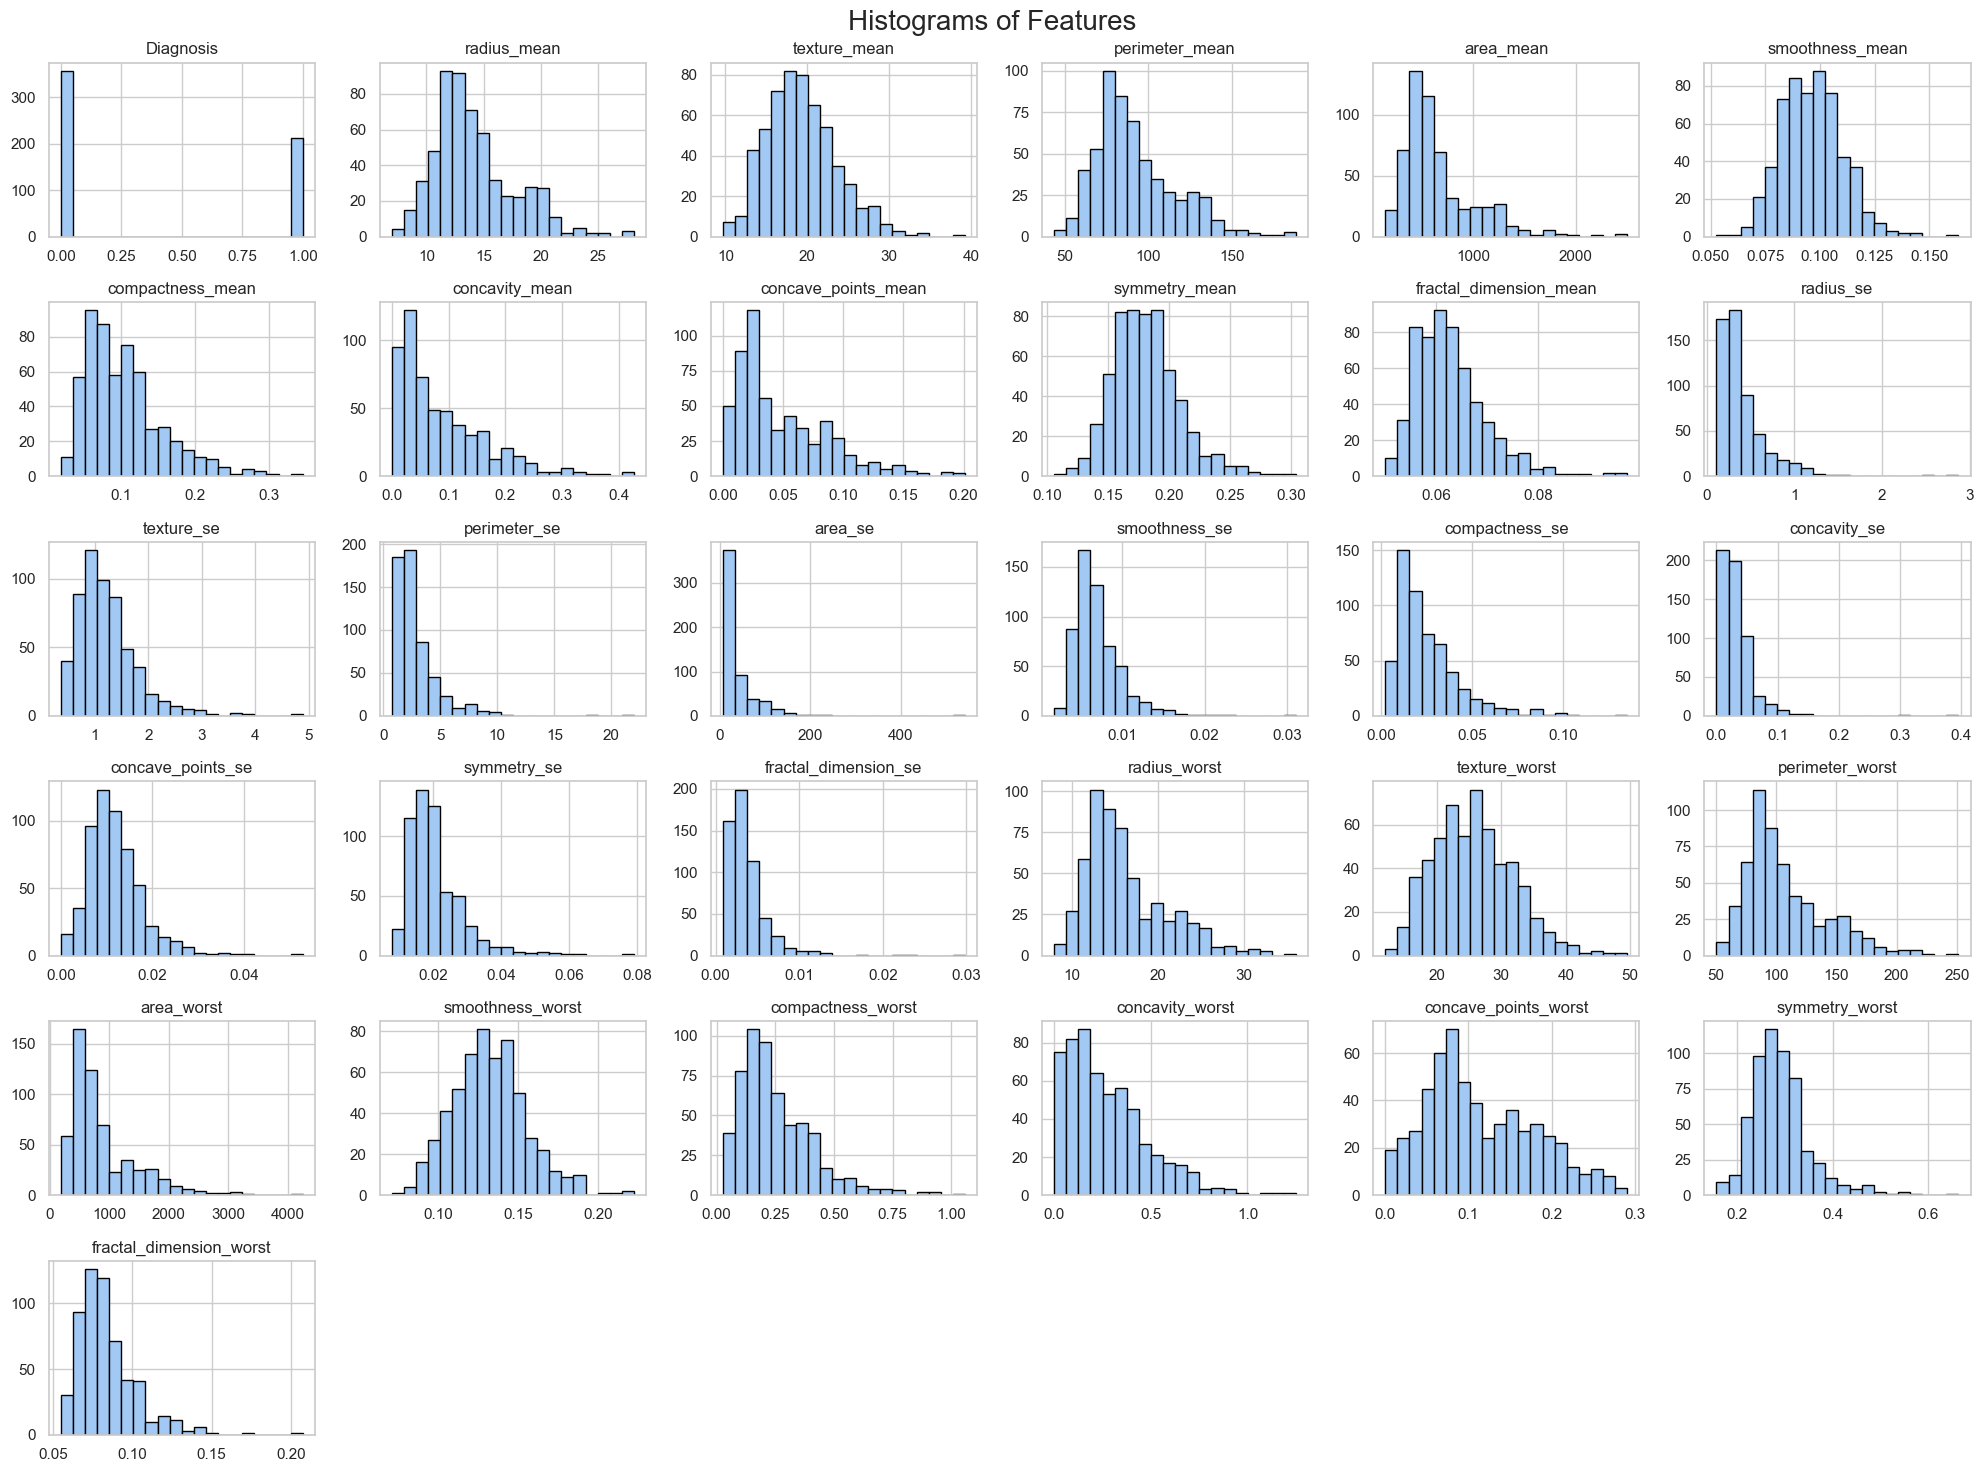

In [9]:
sns.set(style="whitegrid", palette="pastel")
df.hist(bins=20, figsize=(20, 15), edgecolor='black')
plt.suptitle("Histograms of Features", fontsize=20)
plt.tight_layout()
plt.show()

### Pairplot of selected features
Plot a scatter matrix of selected features colored by diagnosis to explore relationships between variables.

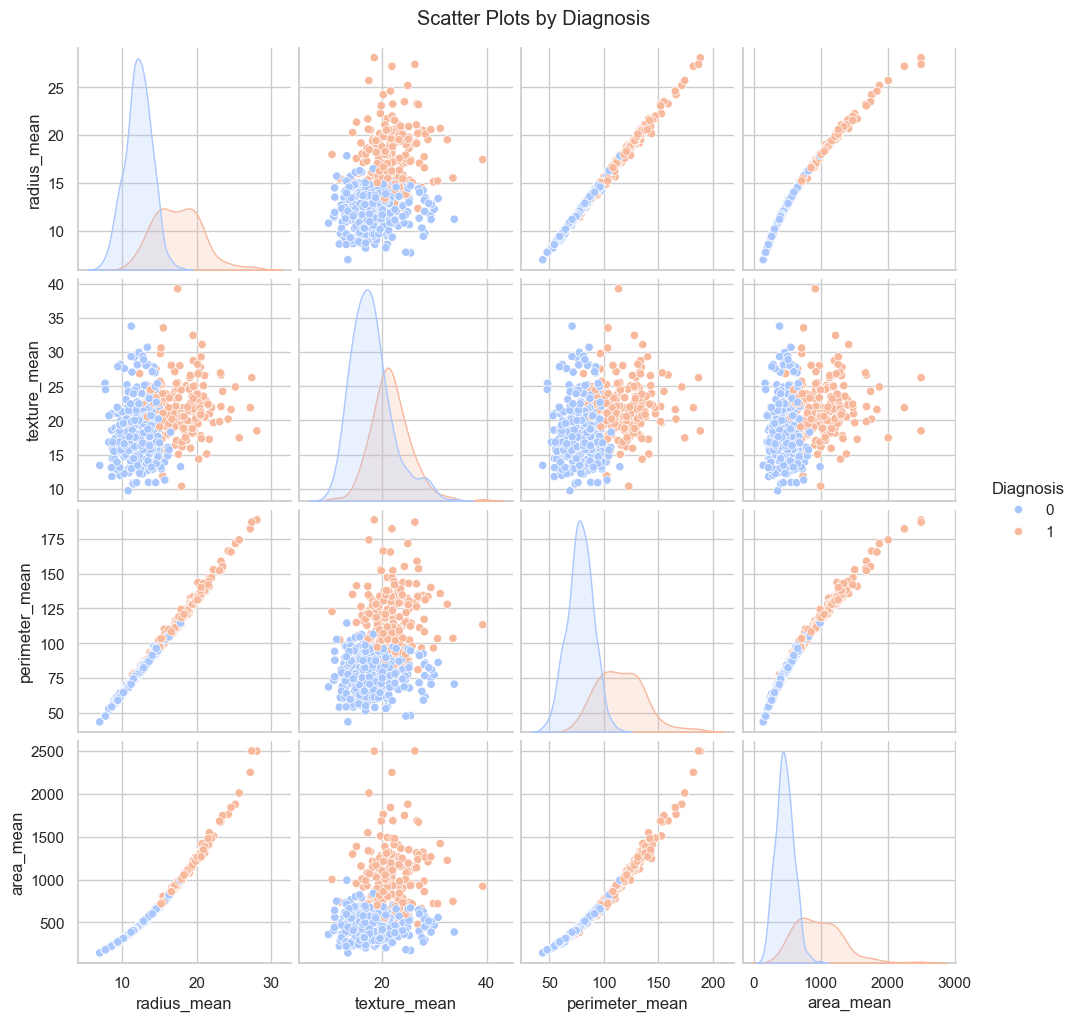

In [10]:
sample_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'Diagnosis']
sns.pairplot(df[sample_features], hue='Diagnosis', palette='coolwarm')
plt.suptitle("Scatter Plots by Diagnosis", y=1.02)
plt.show()

### Correlation heatmap
Generate a heatmap of feature correlations to identify which features are most related to each other.

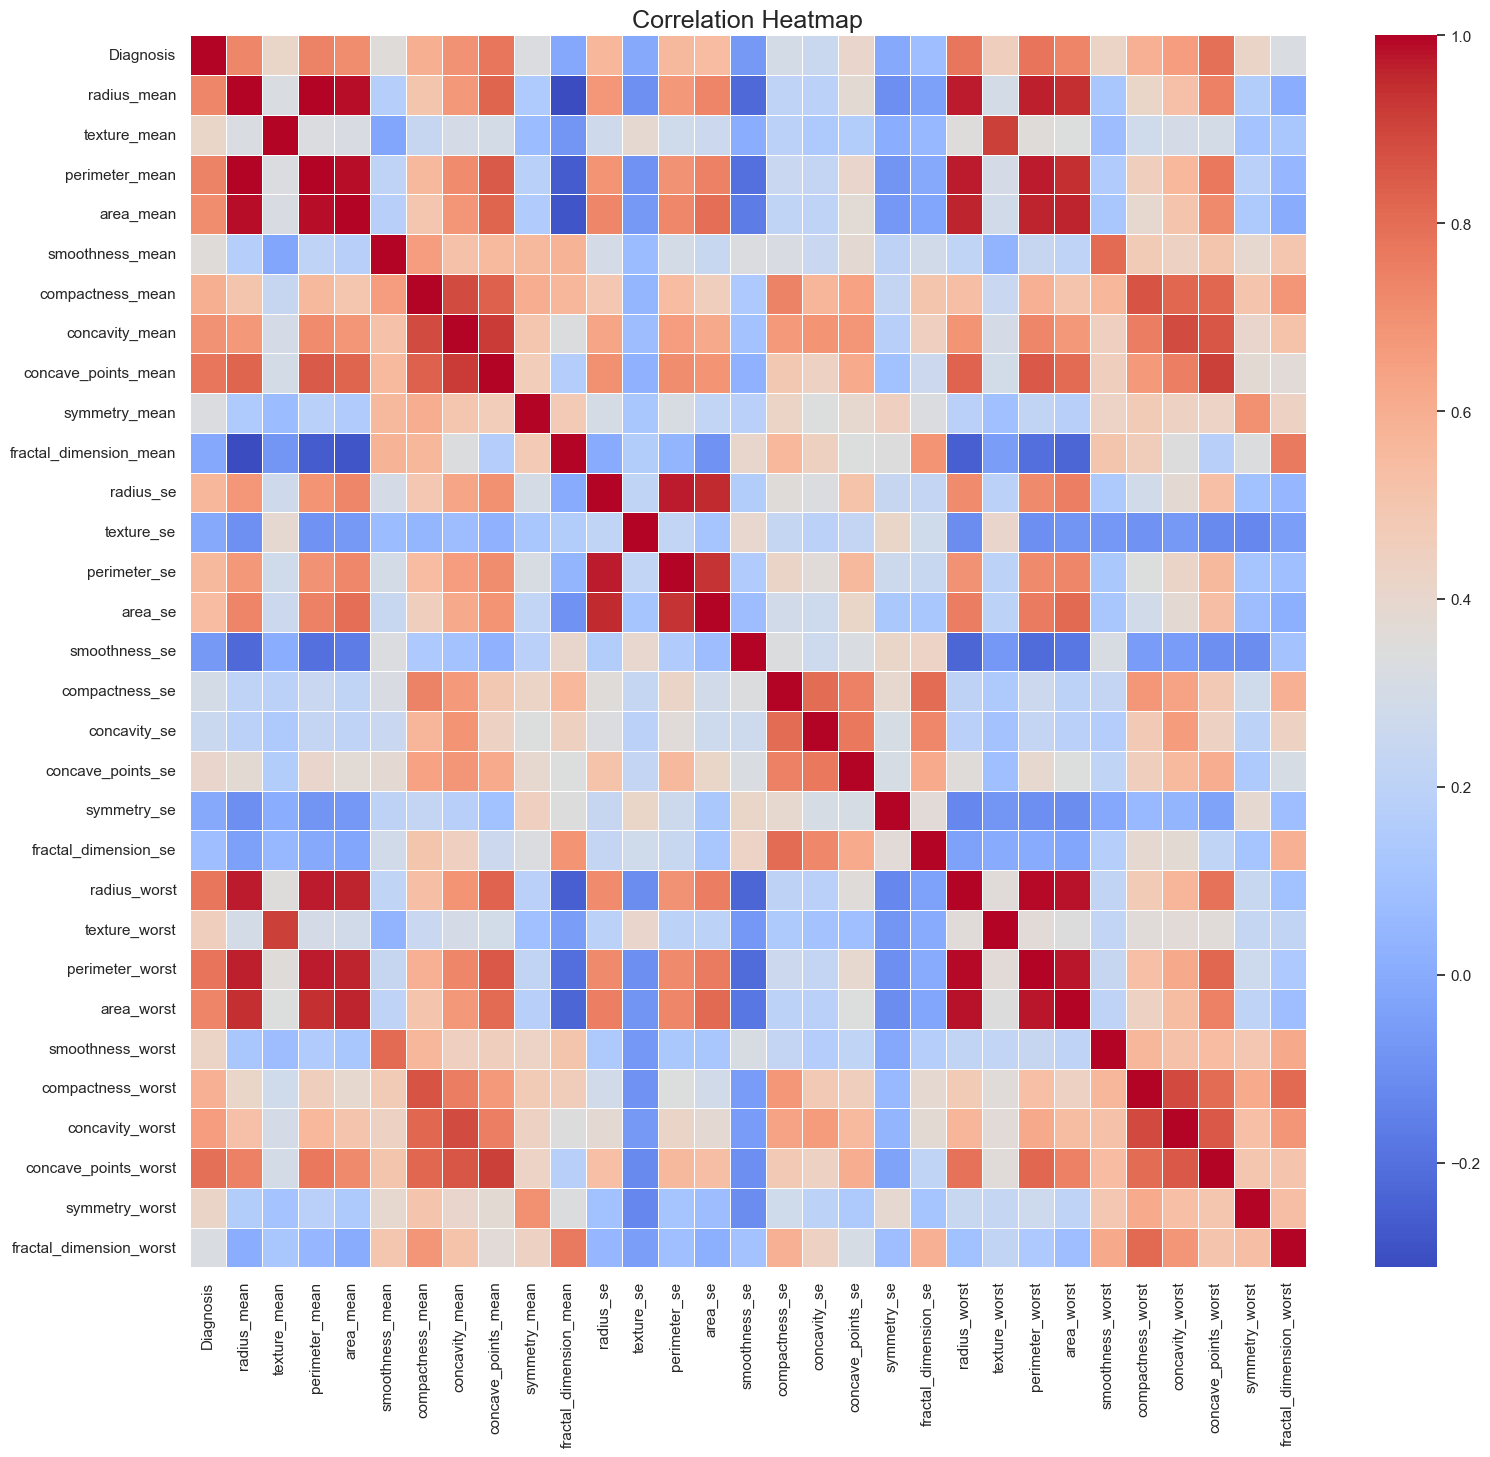

In [11]:
plt.figure(figsize=(18, 16))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=18)
plt.show()

### Box plot for a single feature (radius_mean)
Identify potential outliers in the `radius_mean` feature.

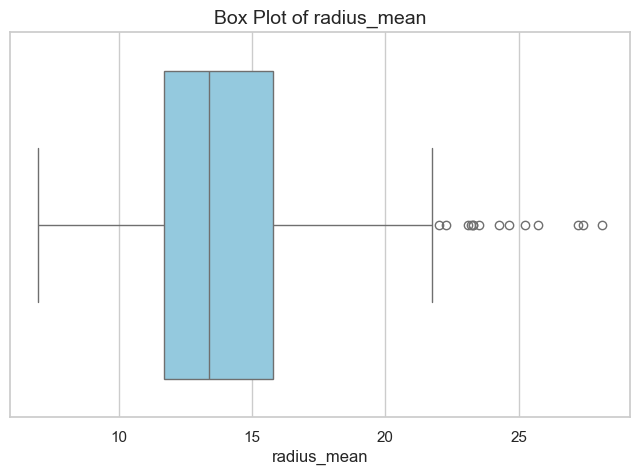

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['radius_mean'], color='skyblue')
plt.title('Box Plot of radius_mean', fontsize=14)
plt.xlabel('radius_mean')
plt.show()

### Select features, scale the data, and split into training/testing sets
- Select features (X) and target (y = Diagnosis).
- Apply StandardScaler for feature normalization.
- Split the dataset using an 80/20 train/test ratio.

In [13]:
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (455, 30)
Testing set shape: (114, 30)


### Simple Linear Regression
- Select the single feature most correlated with `radius_mean`.
- Train a simple linear regression model to predict `radius_mean`.
- Evaluate the model using MSE and R² score.
- Visualize the regression line.

In [14]:
correlations = df.corr()['radius_mean'].drop('radius_mean')
top_feature = correlations.abs().idxmax()

X = df[[top_feature]].values
y = df['radius_mean'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Top correlated feature: {top_feature}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Top correlated feature: perimeter_mean
Mean Squared Error: 0.0517
R² Score: 0.9957


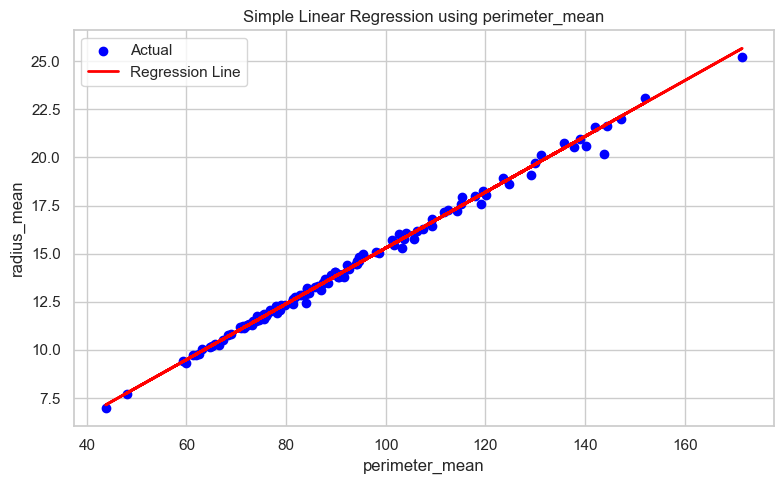

In [15]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel(top_feature)
plt.ylabel("radius_mean")
plt.title(f"Simple Linear Regression using {top_feature}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Multiple Linear Regression
Fit a linear regression model using all features to predict the target variable (Diagnosis).

In [16]:
data = pd.read_csv("D:\\ML\\wdbc.csv", header=None)
columns = ["ID", "Diagnosis"] + [f"feature_{i}" for i in range(1, 31)]
data.columns = columns
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})
data.drop(columns=["ID"], inplace=True)

X = data.drop(columns=["Diagnosis"])
y = data["Diagnosis"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

mlr = LinearRegression()
mlr.fit(X_train, y_train)
y_pred_train = mlr.predict(X_train)
y_pred_test = mlr.predict(X_test)

print("Multiple Linear Regression")
print("Training R²:", r2_score(y_train, y_pred_train))
print("Testing R²:", r2_score(y_test, y_pred_test))
print("Training MSE:", mean_squared_error(y_train, y_pred_train))
print("Testing MSE:", mean_squared_error(y_test, y_pred_test))

Multiple Linear Regression
Training R²: 0.7789778474553671
Testing R²: 0.7271016126223557
Training MSE: 0.05160190663491018
Testing MSE: 0.06410886247029453


### Polynomial Regression
- Apply Polynomial Regression for degrees 2, 3, and 4.
- Evaluate model performance and visualize results.


Polynomial Regression (degree 2)
Training R²: 1.0
Testing R²: -31.807144643584905
Training MSE: 1.8353671656286575e-26
Testing MSE: 7.707003123796914


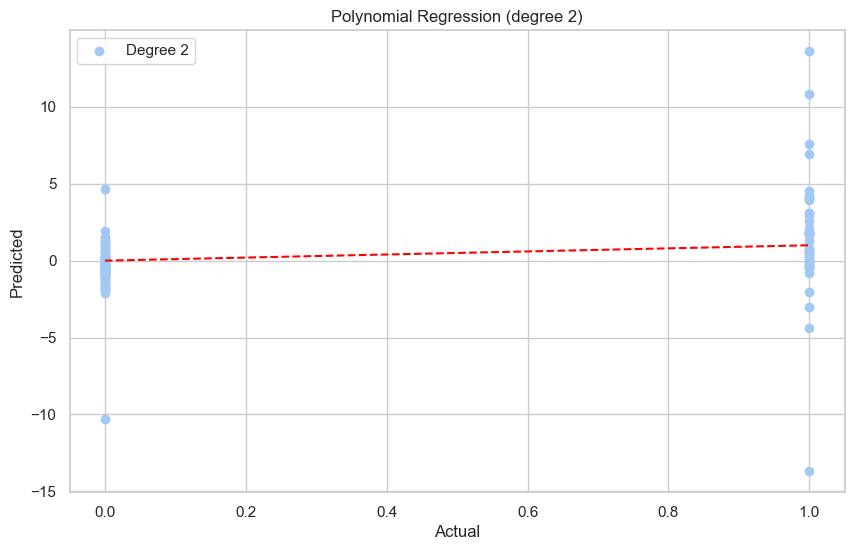


Polynomial Regression (degree 3)
Training R²: 1.0
Testing R²: -3.3445717411665603
Training MSE: 1.1934709684893097e-28
Testing MSE: 1.0206200004448682


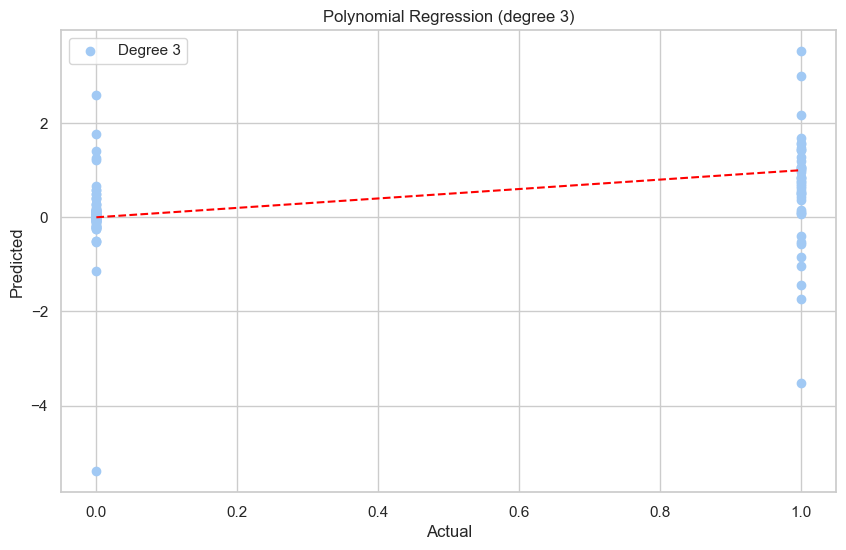


Polynomial Regression (degree 4)
Training R²: 1.0
Testing R²: -25.965250192740083
Training MSE: 8.533675981213889e-27
Testing MSE: 6.334634413545357


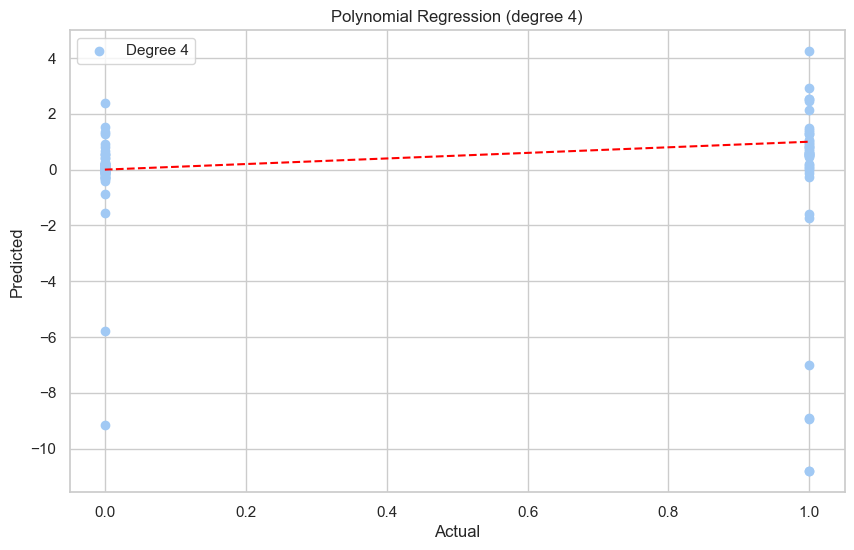

In [17]:
degrees = [2, 3, 4]
for degree in degrees:
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    poly_reg = LinearRegression()
    poly_reg.fit(X_poly, y_train)

    y_poly_pred_train = poly_reg.predict(X_poly)
    y_poly_pred_test = poly_reg.predict(X_poly_test)

    print(f"\nPolynomial Regression (degree {degree})")
    print("Training R²:", r2_score(y_train, y_poly_pred_train))
    print("Testing R²:", r2_score(y_test, y_poly_pred_test))
    print("Training MSE:", mean_squared_error(y_train, y_poly_pred_train))
    print("Testing MSE:", mean_squared_error(y_test, y_poly_pred_test))

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_poly_pred_test, label=f"Degree {degree}")
    plt.plot([0, 1], [0, 1], '--', color='red')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"Polynomial Regression (degree {degree})")
    plt.legend()
    plt.show()

### Logistic Regression
Use logistic regression to classify whether a tumor is benign or malignant.

In [18]:
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

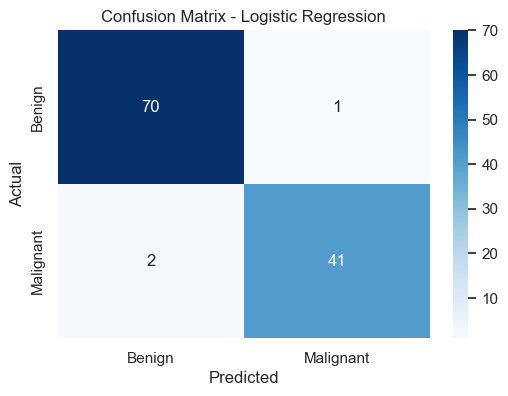

In [19]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()